In [1]:
import pandas as pd

# Load the dataset
file_path = 'with_headers.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(), data.info(), data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738037 entries, 0 to 738036
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   At İsmi   738037 non-null  object 
 1   Irk       738037 non-null  object 
 2   Cinsiyet  738037 non-null  object 
 3   Yaş       738037 non-null  object 
 4   Doğ. Trh  738037 non-null  object 
 5   Handikap  707414 non-null  float64
 6   Tarih     712820 non-null  object 
 7   Şehir     712820 non-null  object 
 8   Mesafe    712820 non-null  float64
 9   Pist      712820 non-null  object 
 10  Derece    712696 non-null  object 
 11  Siklet    712820 non-null  object 
 12  Takı      626136 non-null  object 
 13  Jokey     712817 non-null  object 
 14  Kcins     712820 non-null  object 
 15  details   738037 non-null  object 
dtypes: float64(2), object(14)
memory usage: 90.1+ MB


(      At İsmi      Irk Cinsiyet        Yaş    Doğ. Trh  Handikap       Tarih  \
 0       ﻿ABEL  İngiliz    Erkek  14 y  a a  04.04.2010       NaN  13.04.2013   
 1  ACELE PLUS     Arap    Erkek   5 y  k a  25.02.2019       NaN         NaN   
 2      ABELIA  İngiliz     Dişi   16 y  dk  23.04.2008       NaN  11.06.2011   
 3      ABELIA  İngiliz     Dişi   16 y  dk  23.04.2008       NaN  02.06.2011   
 4       ABJAR     Arap    Erkek   6 y  a a  23.03.2018      32.0  04.06.2022   
 
     Şehir  Mesafe                Pist   Derece Siklet    Takı           Jokey  \
 0  Ankara  1400.0         Ç:Normal3.3  1.29.72     53  KGDBSK         O.FİDAN   
 1     NaN     NaN                 NaN      NaN    NaN     NaN             NaN   
 2  Ankara  1600.0  Ç:Biraz Yumuşak3.4  1.41.59     53     NaN         U.YÜCEL   
 3  Ankara  1600.0        Ç:Yumuşak3.7  1.47.92   51,5     NaN         U.YÜCEL   
 4   İzmir  1900.0         Ç:Normal3.3  2.17.02     54  KGDBSK  A.C.DAĞDEVİREN   
 
          Kcins   

In [2]:
# Remove rows where "Derece" is missing or "Drcsz"
data = data[~data['Derece'].isin(['Drcsz', None, 'NONE'])]

# Remove rows with missing "Şehir" or "Mesafe"
data = data.dropna(subset=['Şehir', 'Mesafe'])

# Convert "Derece" to milliseconds
def convert_to_milliseconds(derece):
    if isinstance(derece, str):
        try:
            minutes, seconds, milliseconds = map(int, derece.split('.'))
            return (minutes * 60 * 1000) + (seconds * 1000) + milliseconds
        except ValueError:
            return None
    return None

data['Derece_ms'] = data['Derece'].apply(convert_to_milliseconds).astype('float32')

# Drop rows where conversion failed (if any)
data = data.dropna(subset=['Derece_ms'])

# Display the first few rows of the cleaned dataset
data.head(), data.info(), data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 700720 entries, 0 to 738036
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   At İsmi    700720 non-null  object 
 1   Irk        700720 non-null  object 
 2   Cinsiyet   700720 non-null  object 
 3   Yaş        700720 non-null  object 
 4   Doğ. Trh   700720 non-null  object 
 5   Handikap   695030 non-null  float64
 6   Tarih      700720 non-null  object 
 7   Şehir      700720 non-null  object 
 8   Mesafe     700720 non-null  float64
 9   Pist       700720 non-null  object 
 10  Derece     700720 non-null  object 
 11  Siklet     700720 non-null  object 
 12  Takı       615592 non-null  object 
 13  Jokey      700719 non-null  object 
 14  Kcins      700720 non-null  object 
 15  details    700720 non-null  object 
 16  Derece_ms  700720 non-null  float32
dtypes: float32(1), float64(2), object(14)
memory usage: 93.6+ MB


(  At İsmi      Irk Cinsiyet        Yaş    Doğ. Trh  Handikap       Tarih  \
 0   ﻿ABEL  İngiliz    Erkek  14 y  a a  04.04.2010       NaN  13.04.2013   
 2  ABELIA  İngiliz     Dişi   16 y  dk  23.04.2008       NaN  11.06.2011   
 3  ABELIA  İngiliz     Dişi   16 y  dk  23.04.2008       NaN  02.06.2011   
 4   ABJAR     Arap    Erkek   6 y  a a  23.03.2018      32.0  04.06.2022   
 5   ABJAR     Arap    Erkek   6 y  a a  23.03.2018      32.0  12.05.2022   
 
     Şehir  Mesafe                Pist   Derece Siklet    Takı           Jokey  \
 0  Ankara  1400.0         Ç:Normal3.3  1.29.72     53  KGDBSK         O.FİDAN   
 2  Ankara  1600.0  Ç:Biraz Yumuşak3.4  1.41.59     53     NaN         U.YÜCEL   
 3  Ankara  1600.0        Ç:Yumuşak3.7  1.47.92   51,5     NaN         U.YÜCEL   
 4   İzmir  1900.0         Ç:Normal3.3  2.17.02     54  KGDBSK  A.C.DAĞDEVİREN   
 5   İzmir  1800.0         Ç:Normal3.3  2.08.28     56  KGDBSK  A.C.DAĞDEVİREN   
 
          Kcins                           

In [3]:
import re

# Function to parse the "Yaş" column into numeric age and classification
def parse_yas(yas):
    # Extract numeric age (the part before 'y')
    age_match = re.search(r'(\d+)\sy', yas)
    age = int(age_match.group(1)) if age_match else None
    
    # Extract the classification symbols after 'y'
    classification_match = re.search(r'y\s*([a-zA-Z]{2})', yas.replace(" ", ""))
    classification = classification_match.group(1) if classification_match else None
    
    return age, classification

# Function to parse the "Pist" column into pist type and condition
def parse_pist(pist):
    # Regular expression to split the string correctly, making the second part optional
    pattern = r"([^:]+):([^0-9]*)(\d+\.\d+)?"

    # Find matches
    matches = re.match(pattern, pist)

    if matches:
        pist_type = matches.group(1).strip()
        pist_condition = matches.group(2).strip() if matches.group(2) else None
    
    return pist_type, pist_condition

# Apply the function to create two new columns
data['Pist_type'], data['Pist_condition'] = zip(*data['Pist'].apply(parse_pist))

# Apply the function to create two new columns
# data['Age'], data['Condition'] = zip(*data['Yaş'].apply(parse_yas))

# Drop the original "Yaş" and "Pist" columns
data = data.drop(columns=['Yaş', 'Pist'])

# Display the first few rows of the cleaned and engineered dataset
print(data.head())
print(data[['Pist_type', 'Pist_condition']].describe(include='all'))

  At İsmi      Irk Cinsiyet    Doğ. Trh  Handikap       Tarih   Şehir  Mesafe  \
0   ﻿ABEL  İngiliz    Erkek  04.04.2010       NaN  13.04.2013  Ankara  1400.0   
2  ABELIA  İngiliz     Dişi  23.04.2008       NaN  11.06.2011  Ankara  1600.0   
3  ABELIA  İngiliz     Dişi  23.04.2008       NaN  02.06.2011  Ankara  1600.0   
4   ABJAR     Arap    Erkek  23.03.2018      32.0  04.06.2022   İzmir  1900.0   
5   ABJAR     Arap    Erkek  23.03.2018      32.0  12.05.2022   İzmir  1800.0   

    Derece Siklet    Takı           Jokey        Kcins  \
0  1.29.72     53  KGDBSK         O.FİDAN       Maiden   
2  1.41.59     53     NaN         U.YÜCEL  Maiden/Dişi   
3  1.47.92   51,5     NaN         U.YÜCEL       Maiden   
4  2.17.02     54  KGDBSK  A.C.DAĞDEVİREN     ŞARTLI 5   
5  2.08.28     56  KGDBSK  A.C.DAĞDEVİREN    ŞARTLI 19   

                                             details  Derece_ms Pist_type  \
0  https://www.tjk.org/TR/YarisSever/Query/Connec...    89072.0         Ç   
2  https:/

In [4]:
data[['Pist_type', 'Pist_condition', 'Kcins', 'Handikap']].describe(include='all')

,Pist_type,Pist_condition,Kcins,Handikap
count,700720,597199,700720,695030.000000
unique,3,10,84,NaN
top,K,Normal,Maiden,NaN
freq,400539,492135,121165,NaN
mean,NaN,NaN,NaN,44.438534
std,NaN,NaN,NaN,26.251705
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,26.000000
50%,NaN,NaN,NaN,40.000000
75%,NaN,NaN,NaN,61.000000


In [5]:
# show all unique values of Pist_condition
data['Pist_condition'].unique()

array(['Normal', 'Biraz Yumuşak', 'Yumuşak', 'Nemli', 'Islak', 'Ağır',
       'Biraz Ağır', None, 'Çok Yumuşak', 'Sulu', 'Çok Ağır'],
      dtype=object)

In [6]:
# calculate the age of the horse at the time of the race
data['Doğum Tarihi'] = pd.to_datetime(data['Doğ. Trh'], dayfirst=True)
data['Yarış Tarihi'] = pd.to_datetime(data['Tarih'], dayfirst=True)
data['Age'] = data['Yarış Tarihi'].dt.year - data['Doğum Tarihi'].dt.year

# drop the original columns
data = data.drop(columns=['Doğ. Trh', 'Tarih', 'Doğum Tarihi', 'Yarış Tarihi'])

# Display the first few rows of the cleaned and engineered dataset
print(data.head())

  At İsmi      Irk Cinsiyet  Handikap   Şehir  Mesafe   Derece Siklet    Takı  \
0   ﻿ABEL  İngiliz    Erkek       NaN  Ankara  1400.0  1.29.72     53  KGDBSK   
2  ABELIA  İngiliz     Dişi       NaN  Ankara  1600.0  1.41.59     53     NaN   
3  ABELIA  İngiliz     Dişi       NaN  Ankara  1600.0  1.47.92   51,5     NaN   
4   ABJAR     Arap    Erkek      32.0   İzmir  1900.0  2.17.02     54  KGDBSK   
5   ABJAR     Arap    Erkek      32.0   İzmir  1800.0  2.08.28     56  KGDBSK   

            Jokey        Kcins  \
0         O.FİDAN       Maiden   
2         U.YÜCEL  Maiden/Dişi   
3         U.YÜCEL       Maiden   
4  A.C.DAĞDEVİREN     ŞARTLI 5   
5  A.C.DAĞDEVİREN    ŞARTLI 19   

                                             details  Derece_ms Pist_type  \
0  https://www.tjk.org/TR/YarisSever/Query/Connec...    89072.0         Ç   
2  https://www.tjk.org/TR/YarisSever/Query/Connec...   101059.0         Ç   
3  https://www.tjk.org/TR/YarisSever/Query/Connec...   107092.0         Ç   


In [7]:
data[["Jokey", "Kcins"]].describe(include='all')

,Jokey,Kcins
count,700719,700720
unique,1267,84
top,M.KAYA,Maiden
freq,11965,121165


In [8]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(df, feature):
    Q1 = np.percentile(df[feature], 20)
    Q3 = np.percentile(df[feature], 80)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

# Detect outliers in "Mesafe" and "Derece_ms" and "Age"
outliers_mesafe = detect_outliers_iqr(data, 'Mesafe')
outliers_derece = detect_outliers_iqr(data, 'Derece_ms')
# outliers_age = detect_outliers_iqr(data, 'Age')

# Display the number of outliers detected
print(f"Outliers detected in 'Mesafe': {len(outliers_mesafe)}")
print(f"Outliers detected in 'Derece_ms': {len(outliers_derece)}")
# print(f"Outliers detected in 'Age': {len(outliers_age)}")

# Combine the outlier indices
outliers = pd.concat([outliers_mesafe, outliers_derece])

# Exclude outliers from the dataset
data = data.drop(outliers.index)

# Display the shape of the dataset after excluding outliers
print(f"Dataset shape after outlier exclusion: {data.shape}")

Outliers detected in 'Mesafe': 81
Outliers detected in 'Derece_ms': 218
Dataset shape after outlier exclusion: (700457, 16)


In [9]:
data[['Şehir', 'Jokey', 'Kcins', 'Pist_type', 'Pist_condition']].describe()

,Şehir,Jokey,Kcins,Pist_type,Pist_condition
count,700457,700456,700457,700457,597002
unique,17,1267,84,3,10
top,İstanbul,M.KAYA,Maiden,K,Normal
freq,123357,11955,121153,400414,492014


In [10]:
# fill missing values in "Handikap" with -1
data['Handikap'] = data['Handikap'].fillna(-1)
# fill missing values in "Pist Condition" with 'Normal'
data['Pist_condition'] = data['Pist_condition'].fillna('Normal')

In [11]:
from sklearn.preprocessing import LabelEncoder
import joblib
import os

# Define features
categorical_columns = ['Jokey', 'Kcins', 'Şehir', 'Pist_type', 'Pist_condition']

# Initialize LabelEncoders
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[f'{col}_label'] = le.fit_transform(data[col].astype(str)).astype('int16')
    label_encoders[col] = le

# Save encoders
encoder_dir = 'encoders'
os.makedirs(encoder_dir, exist_ok=True)
for col, le in label_encoders.items():
    encoder_path = os.path.join(encoder_dir, f'{col}_label_encoder.joblib')
    joblib.dump(le, encoder_path)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700457 entries, 0 to 738036
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   At İsmi               700457 non-null  object 
 1   Irk                   700457 non-null  object 
 2   Cinsiyet              700457 non-null  object 
 3   Handikap              700457 non-null  float64
 4   Şehir                 700457 non-null  object 
 5   Mesafe                700457 non-null  float64
 6   Derece                700457 non-null  object 
 7   Siklet                700457 non-null  object 
 8   Takı                  615369 non-null  object 
 9   Jokey                 700456 non-null  object 
 10  Kcins                 700457 non-null  object 
 11  details               700457 non-null  object 
 12  Derece_ms             700457 non-null  float32
 13  Pist_type             700457 non-null  object 
 14  Pist_condition        700457 non-null  object 
 15  Age  

In [13]:
data.dtypes

At İsmi                  object
Irk                      object
Cinsiyet                 object
Handikap                float64
Şehir                    object
Mesafe                  float64
Derece                   object
Siklet                   object
Takı                     object
Jokey                    object
Kcins                    object
details                  object
Derece_ms               float32
Pist_type                object
Pist_condition           object
Age                       int32
Jokey_label               int16
Kcins_label               int16
Şehir_label               int16
Pist_type_label           int16
Pist_condition_label      int16
dtype: object

In [14]:
# see which columns has missing values
data.isnull().sum()

At İsmi                     0
Irk                         0
Cinsiyet                    0
Handikap                    0
Şehir                       0
Mesafe                      0
Derece                      0
Siklet                      0
Takı                    85088
Jokey                       1
Kcins                       0
details                     0
Derece_ms                   0
Pist_type                   0
Pist_condition              0
Age                         0
Jokey_label                 0
Kcins_label                 0
Şehir_label                 0
Pist_type_label             0
Pist_condition_label        0
dtype: int64

In [15]:
# Step 1: Convert "Cinsiyet" and "Irk" to single binary columns
data['Cinsiyet_binary'] = data['Cinsiyet'].apply(lambda x: 1 if x == 'Erkek' else 0)
data['Irk_binary'] = data['Irk'].apply(lambda x: 1 if x == 'İngiliz' else 0)

In [16]:
from sklearn.preprocessing import MinMaxScaler
import joblib

min_max_scalers = {}
for col in ['Mesafe', 'Derece_ms', 'Age', 'Handikap']:
    scaler = MinMaxScaler()
    data[f'{col}_normalized'] = scaler.fit_transform(data[col].values.reshape(-1, 1)).flatten()
    min_max_scalers[col] = scaler

# save scalers
scaler_dir = 'scalers'
os.makedirs(scaler_dir, exist_ok=True)
for col, scaler in min_max_scalers.items():
    scaler_path = os.path.join(scaler_dir, f'{col}_scaler.joblib')
    joblib.dump(scaler, scaler_path)

# Display the first few rows of the final prepared dataset
print(data.head())

  At İsmi      Irk Cinsiyet  Handikap   Şehir  Mesafe   Derece Siklet    Takı  \
0   ﻿ABEL  İngiliz    Erkek      -1.0  Ankara  1400.0  1.29.72     53  KGDBSK   
2  ABELIA  İngiliz     Dişi      -1.0  Ankara  1600.0  1.41.59     53     NaN   
3  ABELIA  İngiliz     Dişi      -1.0  Ankara  1600.0  1.47.92   51,5     NaN   
4   ABJAR     Arap    Erkek      32.0   İzmir  1900.0  2.17.02     54  KGDBSK   
5   ABJAR     Arap    Erkek      32.0   İzmir  1800.0  2.08.28     56  KGDBSK   

            Jokey  ... Kcins_label Şehir_label  Pist_type_label  \
0         O.FİDAN  ...          58           3                2   
2         U.YÜCEL  ...          59           3                2   
3         U.YÜCEL  ...          58           3                2   
4  A.C.DAĞDEVİREN  ...          82          15                2   
5  A.C.DAĞDEVİREN  ...          74          15                2   

  Pist_condition_label Cinsiyet_binary  Irk_binary  Mesafe_normalized  \
0                    5               

In [17]:
data.describe(include='all')

,At İsmi,Irk,Cinsiyet,Handikap,Şehir,Mesafe,Derece,Siklet,Takı,Jokey,...,Kcins_label,Şehir_label,Pist_type_label,Pist_condition_label,Cinsiyet_binary,Irk_binary,Mesafe_normalized,Derece_ms_normalized,Age_normalized,Handikap_normalized
count,700457,700457,700457,700457.000000,700457,700457.000000,700457,700457,615369,700456,...,700457.000000,700457.000000,700457.000000,700457.000000,700457.000000,700457.000000,700457.000000,700457.000000,700457.000000,700457.000000
unique,39071,2,2,NaN,17,NaN,12889,52,217,1267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,KAYADELEN,İngiliz,Erkek,NaN,İstanbul,NaN,1.29.20,58,KG,M.KAYA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104,360428,389019,NaN,123357,NaN,193,82864,101194,11955,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,44.067156,NaN,1548.733545,NaN,NaN,NaN,NaN,...,50.494846,9.129871,0.770247,4.944875,0.555379,0.514561,0.374367,0.384715,0.161299,0.319625
std,NaN,NaN,NaN,26.458427,NaN,324.530624,NaN,NaN,NaN,NaN,...,24.347488,5.402149,0.927769,1.016031,0.496924,0.499788,0.162265,0.160039,0.121736,0.187648
min,NaN,NaN,NaN,-1.000000,NaN,800.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,26.000000,NaN,1300.000000,NaN,NaN,NaN,NaN,...,24.000000,3.000000,0.000000,5.000000,0.000000,0.000000,0.250000,0.259526,0.083333,0.191489
50%,NaN,NaN,NaN,39.000000,NaN,1400.000000,NaN,NaN,NaN,NaN,...,58.000000,9.000000,0.000000,5.000000,1.000000,1.000000,0.300000,0.343955,0.166667,0.283688
75%,NaN,NaN,NaN,60.000000,NaN,1900.000000,NaN,NaN,NaN,NaN,...,77.000000,15.000000,2.000000,5.000000,1.000000,1.000000,0.550000,0.512957,0.250000,0.432624


In [18]:
from sklearn.model_selection import train_test_split

# Proceed with training the model using the new encoded feature
X = data
y = data['Derece_ms_normalized']

# Split the data, train 95%, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)


# Save training and test csv files
X_train.to_csv('train.csv', index=False)
X_test.to_csv('test.csv', index=False)

In [19]:
X_train.describe()

,Handikap,Mesafe,Derece_ms,Age,Jokey_label,Kcins_label,Şehir_label,Pist_type_label,Pist_condition_label,Cinsiyet_binary,Irk_binary,Mesafe_normalized,Derece_ms_normalized,Age_normalized,Handikap_normalized
count,665434.000000,665434.000000,665434.000000,665434.000000,665434.000000,665434.000000,665434.000000,665434.000000,665434.000000,665434.000000,665434.000000,665434.000000,665434.000000,665434.000000,665434.000000
mean,44.065435,1548.839604,106303.546875,3.935137,601.725447,50.486911,9.129756,0.770106,4.944929,0.555253,0.514461,0.374420,0.384775,0.161261,0.319613
std,26.456432,324.547160,24658.427734,1.460283,357.341630,24.345240,5.402565,0.927720,1.016429,0.496938,0.499791,0.162274,0.160035,0.121690,0.187634
min,-1.000000,800.000000,47017.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,1300.000000,87005.000000,3.000000,323.000000,24.000000,3.000000,0.000000,5.000000,0.000000,0.000000,0.250000,0.259526,0.083333,0.191489
50%,39.000000,1400.000000,100015.000000,4.000000,611.000000,58.000000,9.000000,0.000000,5.000000,1.000000,1.000000,0.300000,0.343962,0.166667,0.283688
75%,60.000000,1900.000000,126055.000000,5.000000,868.000000,77.000000,15.000000,2.000000,5.000000,1.000000,1.000000,0.550000,0.512964,0.250000,0.432624
max,140.000000,2800.000000,201098.000000,14.000000,1267.000000,83.000000,16.000000,2.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# Define the columns to keep
columns_to_keep = ['Age_normalized', 'Cinsiyet_binary', 'Irk_binary']
columns_to_keep += ['Mesafe_normalized', 'Handikap_normalized', 'Pist_type_label', 'Pist_condition_label', 'Kcins_label', 'Şehir_label', 'Jokey_label']

# Select only the columns to keep from the datasets
X_train = X_train[columns_to_keep]
X_test = X_test[columns_to_keep]

In [21]:
# show how many data types we have
X_train.dtypes.value_counts()

int16      5
float64    3
int64      2
Name: count, dtype: int64

In [22]:
import xgboost as xgb
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import mean_squared_error

# Convert the datasets into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_sparse, label=y_train)
dtest = xgb.DMatrix(X_test_sparse, label=y_test)

# Define the hyperparameter space
space = {
    'max_depth': hp.quniform('max_depth', 3, 18, 1),
    'gamma': hp.uniform('gamma', 0, 5),
    'reg_alpha': hp.quniform('reg_alpha', 0, 50, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'n_estimators': hp.quniform('n_estimators', 100, 700, 10),
    'seed': 42
}

# Define the objective function
def objective(space):
    # Convert hyperparameters to the correct type
    params = {
        'max_depth': int(space['max_depth']),
        'gamma': space['gamma'],
        'reg_alpha': int(space['reg_alpha']),
        'reg_lambda': space['reg_lambda'],
        'min_child_weight': int(space['min_child_weight']),
        'colsample_bytree': space['colsample_bytree'],
        'subsample': space['subsample'],
        'learning_rate': space['learning_rate'],
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'seed': int(space['seed']),
    }
    
    # Train the model with early stopping
    evals = [(dtrain, 'train'), (dtest, 'eval')]
    model = xgb.train(params, dtrain, int(space['n_estimators']), evals=evals, 
                      early_stopping_rounds=10, verbose_eval=False)
    
    # Predict on the validation set
    preds = model.predict(dtest, iteration_range=(0, model.best_iteration))
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    print(f"RMSE: {rmse}, Best Iteration: {model.best_iteration}, Params: {space}")
    
    return {'loss': rmse, 'status': STATUS_OK}

# Perform hyperparameter tuning
trials = Trials()
best_hyperparams = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=5000,
    trials=trials
)

print("The best hyperparameters are: ", best_hyperparams)

NameError: name 'X_train_sparse' is not defined

In [38]:
best_hyperparams = {
    "colsample_bytree": 0.8892918749323597,
    "gamma": 3.426969056797831e-05,
    "learning_rate": 0.15235729870805292,
    "max_depth": 13.0,
    "min_child_weight": 10.0,
    "n_estimators": 580.0,
    "reg_alpha": 1.0,
    "reg_lambda": 0.1401499305064085,
    "subsample": 0.860562211006825
}

new_params = {
    "max_depth": 10,
    "learning_rate": 0.12,
    "subsample": 0.8569259180972277,
    "colsample_bytree": 0.6021710512299691,
    "min_child_weight": 3,
    "reg_alpha": 1.9017914552743718,
    "reg_lambda": 0.5127104705250967,
    "gamma": 0.0011727962182939144,
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "tree_method": "hist",
    "seed": 42
}


In [24]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [25]:
import xgboost as xgb

# Update the best hyperparameters with fixed parameters
best_params = {
    'max_depth': int(best_hyperparams['max_depth']),
    'learning_rate': best_hyperparams['learning_rate'],
    'subsample': best_hyperparams['subsample'],
    'colsample_bytree': best_hyperparams['colsample_bytree'],
    'reg_alpha': best_hyperparams['reg_alpha'],
    'reg_lambda': best_hyperparams['reg_lambda'],
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'tree_method': 'hist',
    'seed': 42,
    'eval_metric': 'rmse'
}

# Convert to DMatrix with native categorical support (XGBoost >=1.3.0)
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Define evaluation sets
evals = [(dtrain, 'train'), (dtest, 'validation')]

# Train the final model
final_model = xgb.train(
    best_params,
    dtrain,
    num_boost_round=500,            # Large number to allow early stopping to decide
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

# Save the model
final_model.save_model('xgboost_final_model.json')

[0]	train-rmse:0.13730	validation-rmse:0.13721
[1]	train-rmse:0.11752	validation-rmse:0.11747
[2]	train-rmse:0.10093	validation-rmse:0.10093
[3]	train-rmse:0.08691	validation-rmse:0.08694
[4]	train-rmse:0.07535	validation-rmse:0.07542
[5]	train-rmse:0.06576	validation-rmse:0.06586
[6]	train-rmse:0.05820	validation-rmse:0.05832
[7]	train-rmse:0.05207	validation-rmse:0.05222
[8]	train-rmse:0.04661	validation-rmse:0.04679
[9]	train-rmse:0.04209	validation-rmse:0.04230
[10]	train-rmse:0.03850	validation-rmse:0.03873
[11]	train-rmse:0.03596	validation-rmse:0.03621
[12]	train-rmse:0.03367	validation-rmse:0.03394
[13]	train-rmse:0.03190	validation-rmse:0.03219
[14]	train-rmse:0.03070	validation-rmse:0.03101
[15]	train-rmse:0.02963	validation-rmse:0.02996
[16]	train-rmse:0.02878	validation-rmse:0.02912
[17]	train-rmse:0.02815	validation-rmse:0.02851
[18]	train-rmse:0.02797	validation-rmse:0.02834
[19]	train-rmse:0.02750	validation-rmse:0.02789
[20]	train-rmse:0.02715	validation-rmse:0.02755
[2

In [39]:
import xgboost as xgb

# Update the best hyperparameters with fixed parameters
best_params = {
    'max_depth': int(new_params['max_depth']),
    'learning_rate': new_params['learning_rate'],
    'subsample': new_params['subsample'],
    'colsample_bytree': new_params['colsample_bytree'],
    'reg_alpha': new_params['reg_alpha'],
    'reg_lambda': new_params['reg_lambda'],
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'tree_method': 'hist',
    'seed': 42,
    'eval_metric': 'rmse'
}

# Convert to DMatrix with native categorical support (XGBoost >=1.3.0)
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Define evaluation sets
evals = [(dtrain, 'train'), (dtest, 'validation')]

# Train the final model
final_model = xgb.train(
    best_params,
    dtrain,
    num_boost_round=1000,            # Large number to allow early stopping to decide
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

# Save the model
final_model.save_model('xgboost_final_model.json')

[0]	train-rmse:0.14254	validation-rmse:0.14260
[1]	train-rmse:0.13817	validation-rmse:0.13825
[2]	train-rmse:0.12353	validation-rmse:0.12359
[3]	train-rmse:0.10979	validation-rmse:0.10984
[4]	train-rmse:0.09803	validation-rmse:0.09808
[5]	train-rmse:0.08763	validation-rmse:0.08767
[6]	train-rmse:0.07913	validation-rmse:0.07915
[7]	train-rmse:0.07185	validation-rmse:0.07186
[8]	train-rmse:0.06496	validation-rmse:0.06497
[9]	train-rmse:0.05912	validation-rmse:0.05912
[10]	train-rmse:0.05381	validation-rmse:0.05379
[11]	train-rmse:0.04981	validation-rmse:0.04978
[12]	train-rmse:0.04593	validation-rmse:0.04589
[13]	train-rmse:0.04272	validation-rmse:0.04267
[14]	train-rmse:0.04037	validation-rmse:0.04031
[15]	train-rmse:0.03811	validation-rmse:0.03804
[16]	train-rmse:0.03625	validation-rmse:0.03618
[17]	train-rmse:0.03462	validation-rmse:0.03455
[18]	train-rmse:0.03439	validation-rmse:0.03433
[19]	train-rmse:0.03393	validation-rmse:0.03387
[20]	train-rmse:0.03366	validation-rmse:0.03361
[2

In [26]:
dtrain.feature_names

['Age_normalized',
 'Cinsiyet_binary',
 'Irk_binary',
 'Mesafe_normalized',
 'Handikap_normalized',
 'Pist_type_label',
 'Pist_condition_label',
 'Kcins_label',
 'Şehir_label',
 'Jokey_label']

In [27]:
X_train.describe()

,Age_normalized,Cinsiyet_binary,Irk_binary,Mesafe_normalized,Handikap_normalized,Pist_type_label,Pist_condition_label,Kcins_label,Şehir_label,Jokey_label
count,657856.000000,657856.000000,657856.000000,657856.000000,657856.000000,657856.000000,657856.000000,657856.000000,657856.000000,657856.000000
mean,0.312082,0.551654,0.519402,0.373486,0.317744,0.775195,4.945652,50.433758,9.119663,601.650065
std,0.223867,0.497325,0.499624,0.162114,0.186837,0.928739,1.018083,24.317997,5.403734,357.422129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.000000,0.000000,0.250000,0.191489,0.000000,5.000000,24.000000,3.000000,323.000000
50%,0.333333,1.000000,1.000000,0.300000,0.283688,0.000000,5.000000,58.000000,9.000000,611.000000
75%,0.333333,1.000000,1.000000,0.550000,0.432624,2.000000,5.000000,76.000000,15.000000,868.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,9.000000,83.000000,16.000000,1267.000000


In [44]:
import numpy as np
from scipy.stats import uniform, randint

param_dist = {
    'max_depth': randint(7, 15),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),         # Range: 0.6 to 1.0
    'colsample_bytree': uniform(0.6, 0.4),  # Range: 0.6 to 1.0
    'min_child_weight': randint(1, 10),
    'reg_alpha': uniform(0, 2),
    'reg_lambda': uniform(0, 2),
    'gamma': uniform(0, 5),
    'n_estimators': randint(200, 600),
}


def random_search_xgboost(param_dist, dtrain, dval, num_iter=20):
    best_rmse = float("Inf")
    best_params = None
    best_iteration = 0

    for i in range(num_iter):
        # Randomly sample parameters
        params = {
            'max_depth': int(param_dist['max_depth'].rvs()),
            'learning_rate': param_dist['learning_rate'].rvs(),
            'subsample': param_dist['subsample'].rvs(),
            'colsample_bytree': param_dist['colsample_bytree'].rvs(),
            'min_child_weight': int(param_dist['min_child_weight'].rvs()),
            'reg_alpha': param_dist['reg_alpha'].rvs(),
            'reg_lambda': param_dist['reg_lambda'].rvs(),
            'gamma': param_dist['gamma'].rvs(),
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'tree_method': 'hist',
            'seed': 42,
        }

        num_round = int(param_dist['n_estimators'].rvs())

        evals = [(dtrain, 'train'), (dval, 'eval')]

        # Train the model with early stopping
        model = xgb.train(
            params=params,
            dtrain=dtrain,
            num_boost_round=num_round,
            evals=evals,
            early_stopping_rounds=10,
            verbose_eval=False
        )

        rmse = model.best_score
        iteration = model.best_iteration

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = params
            best_iteration = iteration
            print(f"Iteration {i+1}: RMSE={rmse:.4f}, Params={params}, Num_Rounds={iteration+1}")

    print(f"\nBest RMSE: {best_rmse:.4f} with Params: {best_params}, Num_Rounds: {best_iteration+1}")
    return best_params, best_iteration + 1


# Convert to DMatrix with native categorical support (XGBoost >=1.3.0)
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Define evaluation sets
evals = [(dtrain, 'train'), (dtest, 'validation')]

best_params, best_num_boost_round = random_search_xgboost(param_dist, dtrain, dtest, num_iter=2500)

Iteration 1: RMSE=0.0290, Params={'max_depth': 10, 'learning_rate': np.float64(0.14787698582225664), 'subsample': np.float64(0.6850569927240997), 'colsample_bytree': np.float64(0.9132960668701866), 'min_child_weight': 8, 'reg_alpha': np.float64(1.8737442260519677), 'reg_lambda': np.float64(1.6597827520639807), 'gamma': np.float64(1.5736545653810086), 'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'tree_method': 'hist', 'seed': 42}, Num_Rounds=50
Iteration 4: RMSE=0.0288, Params={'max_depth': 14, 'learning_rate': np.float64(0.16177849987449666), 'subsample': np.float64(0.909890610964092), 'colsample_bytree': np.float64(0.8118012048120689), 'min_child_weight': 3, 'reg_alpha': np.float64(0.3671663111103969), 'reg_lambda': np.float64(0.2965699761278422), 'gamma': np.float64(1.7985970303830205), 'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'tree_method': 'hist', 'seed': 42}, Num_Rounds=45
Iteration 12: RMSE=0.0272, Params={'max_depth': 7, 'learning_rate': np.float64(0.04

KeyboardInterrupt: 

In [39]:
best_params = {
    "max_depth": 10,
    "learning_rate": 0.06,
    "subsample": 0.69,
    "colsample_bytree": 0.8,
    "reg_alpha": 0.275,
    "reg_lambda": 0.895,
    "gamma": 0.014,
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "tree_method": "hist",
    "seed": 42
}

In [40]:
final_model = xgb.train(
    params=best_params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

[0]	train-rmse:0.01903	validation-rmse:0.01944
[1]	train-rmse:0.01795	validation-rmse:0.01836
[2]	train-rmse:0.01694	validation-rmse:0.01736
[3]	train-rmse:0.01600	validation-rmse:0.01643
[4]	train-rmse:0.01512	validation-rmse:0.01555
[5]	train-rmse:0.01429	validation-rmse:0.01474
[6]	train-rmse:0.01356	validation-rmse:0.01402
[7]	train-rmse:0.01288	validation-rmse:0.01335
[8]	train-rmse:0.01220	validation-rmse:0.01269
[9]	train-rmse:0.01157	validation-rmse:0.01207
[10]	train-rmse:0.01097	validation-rmse:0.01150
[11]	train-rmse:0.01046	validation-rmse:0.01100
[12]	train-rmse:0.00994	validation-rmse:0.01050
[13]	train-rmse:0.00946	validation-rmse:0.01004
[14]	train-rmse:0.00905	validation-rmse:0.00964
[15]	train-rmse:0.00864	validation-rmse:0.00925
[16]	train-rmse:0.00825	validation-rmse:0.00888
[17]	train-rmse:0.00789	validation-rmse:0.00855
[18]	train-rmse:0.00782	validation-rmse:0.00848
[19]	train-rmse:0.00749	validation-rmse:0.00817
[20]	train-rmse:0.00719	validation-rmse:0.00789
[2

In [29]:
# Get feature importance
importance = final_model.get_score(importance_type='weight')

# Sort the features by importance
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance
for feature, score in sorted_importance:
    print(f"Feature: {feature}, Importance: {score}")

Feature: Jokey_label, Importance: 28121.0
Feature: Handikap_normalized, Importance: 27370.0
Feature: Kcins_label, Importance: 21800.0
Feature: Pist_condition_label, Importance: 13552.0
Feature: Mesafe_normalized, Importance: 12361.0
Feature: Şehir_label, Importance: 11836.0
Feature: Age_normalized, Importance: 11075.0
Feature: Pist_type_label, Importance: 3470.0
Feature: Cinsiyet_binary, Importance: 2332.0
Feature: Irk_binary, Importance: 1956.0


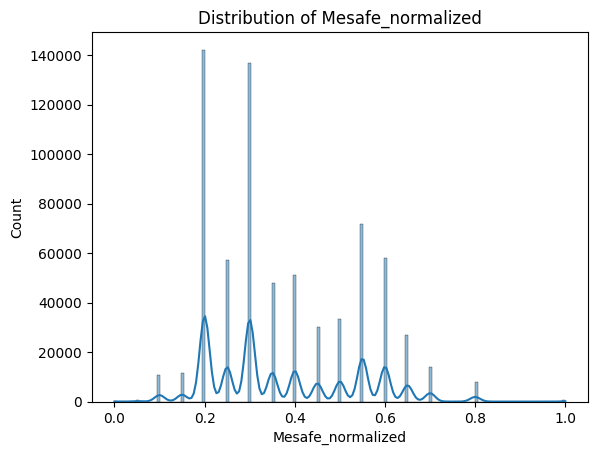

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['Mesafe_normalized'], kde=True)
plt.title('Distribution of Mesafe_normalized')
plt.show()

In [26]:
correlation = data[['Mesafe_normalized', 'Derece_ms_normalized']].corr()
print(correlation)

                      Mesafe_normalized  Derece_ms_normalized
Mesafe_normalized              1.000000              0.926387
Derece_ms_normalized           0.926387              1.000000


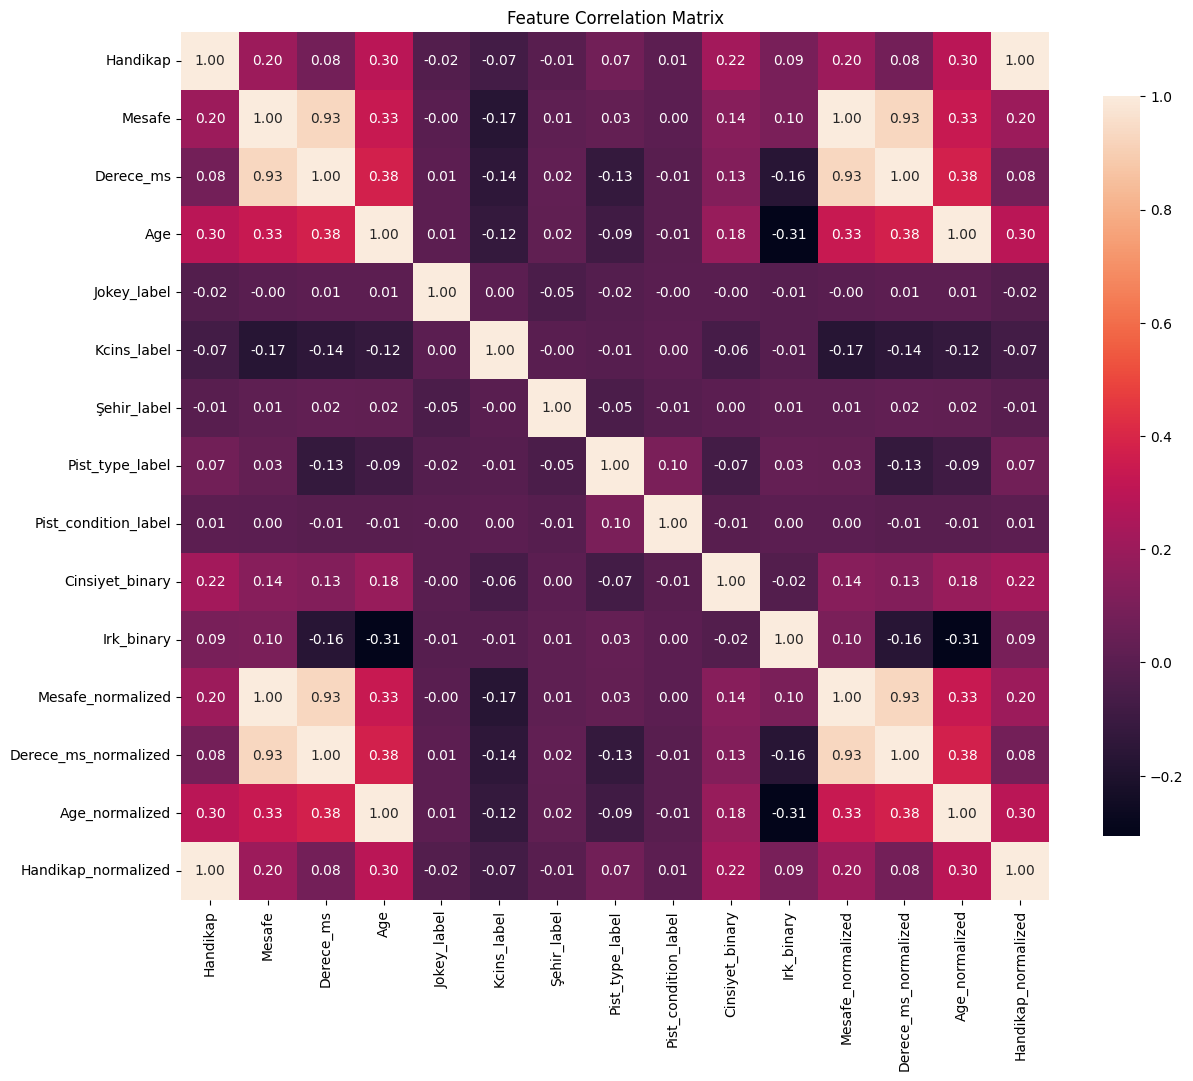

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

# Plot the heatmap with annotations formatted to 2 decimal points
plt.figure(figsize=(14, 12))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.show()


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

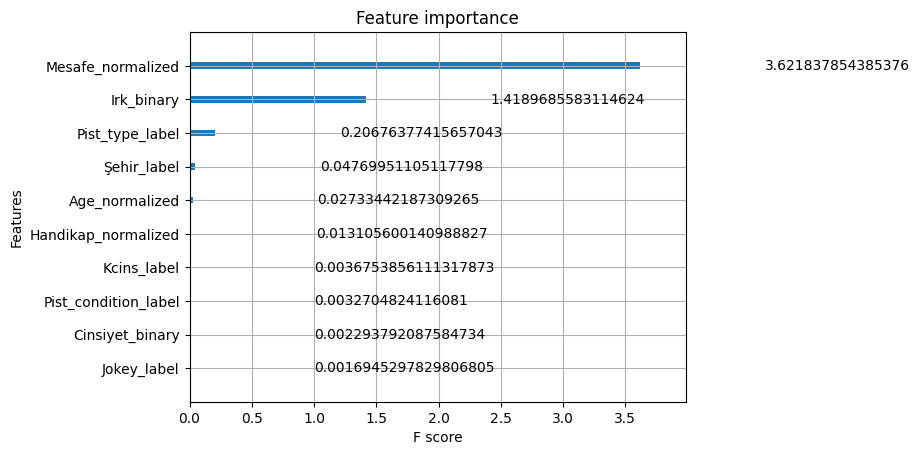

In [32]:
xgb.plot_importance(final_model, importance_type='gain')

In [42]:
# Import the necessary library for DMatrix
import xgboost as xgb

# turn ms into minutes:seconds:milliseconds
def convert_to_time(derece):
    minutes = int(derece / (60 * 1000))
    seconds = int((derece % (60 * 1000)) / 1000)
    milliseconds = int(derece % 1000)
    return f'{minutes}:{seconds:02d}.{milliseconds:03d}'

# Let's take a random sample from the test set
sample_index = 8
sample_data = X_test[sample_index:sample_index+1]

# Convert the sample data to DMatrix format
dmat_sample_data = xgb.DMatrix(sample_data)

# Make a prediction
predicted_derece_ms = final_model.predict(dmat_sample_data)
print(f'Predicted Derece_ms: {predicted_derece_ms[0]}')

# Convert the normalized prediction back to the original scale
derece_ms_scaler = min_max_scalers['Derece_ms']
predicted_derece = derece_ms_scaler.inverse_transform([[predicted_derece_ms[0]]])[0][0]
print(f'Predicted Derece: {predicted_derece}')

# Convert the predicted time to the desired format
predicted_time = convert_to_time(predicted_derece)
print(f'Predicted Time: {predicted_time}')

Predicted Derece_ms: 0.5613689422607422
Predicted Derece: 133513.28960356617
Predicted Time: 2:13.513


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


space = {
    'max_depth': hp.quniform('max_depth', 3, 18, 1),
    'gamma': hp.uniform('gamma', 0, 10),
    'reg_alpha': hp.quniform('reg_alpha', 0, 100, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 10),
    'seed': 42
}

def objective(space):
    model = xgb.XGBRegressor(
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        gamma=space['gamma'],
        reg_alpha=int(space['reg_alpha']),
        reg_lambda=space['reg_lambda'],
        min_child_weight=int(space['min_child_weight']),
        colsample_bytree=space['colsample_bytree'],
        subsample=space['subsample'],
        learning_rate=space['learning_rate'],
        seed=space['seed']
    )

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)
    
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds)
    
    print(f"RMSE: {rmse}")
    
    return {'loss': rmse, 'status': STATUS_OK}


trials = Trials()

best_hyperparams = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

print("The best hyperparameters are: ", best_hyperparams)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import cross_val_score

space = {
    'max_depth': hp.quniform('max_depth', 3, 14, 1),
    'gamma': hp.uniform('gamma', 0, 5),  # Adjusted range
    'reg_alpha': hp.quniform('reg_alpha', 0, 50, 1),  # Adjusted range
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),  # Slightly extended upper range
    'n_estimators': hp.quniform('n_estimators', 100, 700, 10),  # Adjusted upper limit
    'seed': 42
}
import matplotlib.pyplot as plt

def plot_learning_curve(evals_result):
    epochs = len(evals_result['validation_0']['rmse'])
    x_axis = range(0, epochs)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_axis, evals_result['validation_0']['rmse'], label='Train')
    plt.plot(x_axis, evals_result['validation_1']['rmse'], label='Validation')
    plt.xlabel('Boosting Rounds')
    plt.ylabel('RMSE')
    plt.title('XGBoost Learning Curve')
    plt.legend()
    plt.show()

# Updated objective function with overfitting detection
def objective(space):
    model = xgb.XGBRegressor(
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        gamma=space['gamma'],
        reg_alpha=int(space['reg_alpha']),
        reg_lambda=space['reg_lambda'],
        min_child_weight=int(space['min_child_weight']),
        colsample_bytree=space['colsample_bytree'],
        subsample=space['subsample'],
        learning_rate=space['learning_rate'],
        seed=space['seed']
    )

    evals_result = {}
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
              verbose=True)
    
    # Get the evaluation results from the model
    evals_result = model.evals_result()
    
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    
    print(f"Training RMSE: {evals_result['validation_0']['rmse'][-1]}")
    print(f"Validation RMSE: {evals_result['validation_1']['rmse'][-1]}")
    
    plot_learning_curve(evals_result)
    
    return {'loss': rmse, 'status': STATUS_OK}

# Run the tuning process
trials = Trials()
best_hyperparams = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

print("The best hyperparameters are: ", best_hyperparams)

In [ ]:
best_model = xgb.XGBRegressor(
    n_estimators=int(best_hyperparams['n_estimators']),
    max_depth=int(best_hyperparams['max_depth']),
    gamma=best_hyperparams['gamma'],
    reg_alpha=int(best_hyperparams['reg_alpha']),
    reg_lambda=best_hyperparams['reg_lambda'],
    min_child_weight=int(best_hyperparams['min_child_weight']),
    colsample_bytree=best_hyperparams['colsample_bytree'],
    subsample=best_hyperparams['subsample'],
    learning_rate=best_hyperparams['learning_rate']
)

best_model.fit(X_train, y_train, verbose=True, eval_set=[(X_test, y_test)])
final_preds = best_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_preds)

print(f"Final RMSE on the test set: {final_rmse}")


In [ ]:
import joblib
joblib.dump(best_model, 'xgb_model_optimized.pkl')

In [ ]:
import joblib

best_model = joblib.load('xgb_model_optimized.pkl')
final_preds = best_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_preds)

print(f"Final RMSE on the test set: {final_rmse}")